In [9]:
import pandas as pd

# 定义CSV文件路径
file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\original_0508\20220701_1_经纬度.csv'

# 读取CSV文件
df = pd.read_csv(file_path)

# 定位重复的 'LON' 值及其下标
# df.duplicated() 会返回一个布尔序列，标记重复的行
# 对于相邻重复的行，我们使用 shift() 函数来比较当前行和前一行
# 然后我们使用 idxmax() 来获取重复行的索引
duplicated_indices = df[df['LON'].shift(1) == df['LON']].index.tolist()

# 打印结果
print("重复的 'LON' 值的下标（从0开始计数）:")
print(duplicated_indices)

# 如果需要，也可以打印重复的 'LON' 值
print("\n重复的 'LON' 值：")
print(df['LON'].iloc[duplicated_indices])

重复的 'LON' 值的下标（从0开始计数）:
[]

重复的 'LON' 值：
Series([], Name: LON, dtype: float64)


In [6]:
import pandas as pd

# 定义CSV文件路径
file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\original_0508\20220701_1_processed.csv'

# 读取CSV文件
df = pd.read_csv(file_path)

# 定位重复的 'LON' 值及其下标
duplicated_indices = df[df['LON'].shift(1) == df['LON']].index.tolist()

# 打印结果
print("重复的 'LON' 值的下标（从0开始计数）:")
print(duplicated_indices)

# 计算并打印TRP时间的差值
if duplicated_indices:
    print("\nTRP时间的差值（相邻重复LON值的时间戳差）:")
    time_diffs = df['TRP'].iloc[duplicated_indices] - df['TRP'].shift(1).iloc[duplicated_indices]
    print(time_diffs)

# 如果需要，也可以打印重复的 'LON' 值
print("\n重复的 'LON' 值：")
print(df['LON'].iloc[duplicated_indices])

# 打印对应的 'TRP' 时间戳
print("\n对应的 'TRP' 时间戳：")
print(df['TRP'].iloc[duplicated_indices])

重复的 'LON' 值的下标（从0开始计数）:
[]

重复的 'LON' 值：
Series([], Name: LON, dtype: float64)

对应的 'TRP' 时间戳：
Series([], Name: TRP, dtype: float64)


In [1]:
import pandas as pd

# 定义CSV文件路径
file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\original_0508\20220701_1.csv'

# 读取CSV文件
df = pd.read_csv(file_path)

# 计算相邻LON值的差异
df['diff_LON'] = df['LON'].diff().abs()

# 找出LON值相同的相邻行（即差异为0）
duplicated_indices = df[df['diff_LON'] == 0].index

# 存储重复点的信息和选择保存的点
duplicated_info = []
to_keep_info = []

# 对于这些相邻重复的行，计算它们的所有特征的平均值
for i in duplicated_indices:
    # 找到当前重复行的前一行
    previous_index = i - 1
    
    # 计算平均值
    mean_values = (df.loc[previous_index] + df.loc[i]) / 2
    
    # 打印重复点的信息
    duplicated_info.append((previous_index, i, df.loc[previous_index], df.loc[i]))
    print(f"重复点: 索引 {previous_index} 和 {i}")
    print(f"行数据: {df.loc[previous_index]} 和 {df.loc[i]}")
    
    # 选择保存的点（这里我们选择保存平均值）
    to_keep_info.append(mean_values)
    print(f"保存的点: {mean_values}")
    print("---")

# 创建一个新的DataFrame来保存平均值
avg_df = pd.DataFrame(to_keep_info, columns=df.columns)

# 删除原始DataFrame中的所有重复行
df = df.drop(duplicated_indices)

# 将平均值DataFrame拼接回原始DataFrame
df = pd.concat([df, avg_df], ignore_index=True)

# 保存处理后的数据到新的CSV文件
output_file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\original_0508\20220701_1_processed.csv'
df.to_csv(output_file_path, index=False)

print(f"处理完成，结果保存至 '{output_file_path}'")

重复点: 索引 39 和 40
行数据: TRP         23990.375000
LON            89.504129
LAT            46.807240
TA            298.125000
GS              9.359500
diff_LON        0.000038
Name: 39, dtype: float64 和 TRP         23990.875000
LON            89.504129
LAT            46.807240
TA            298.125000
GS              9.359500
diff_LON        0.000000
Name: 40, dtype: float64
保存的点: TRP         23990.625000
LON            89.504129
LAT            46.807240
TA            298.125000
GS              9.359500
diff_LON        0.000019
dtype: float64
---
重复点: 索引 44 和 45
行数据: TRP         23994.500000
LON            89.503995
LAT            46.807272
TA            289.687500
GS              6.510900
diff_LON        0.000032
Name: 44, dtype: float64 和 TRP         23994.929700
LON            89.503995
LAT            46.807272
TA            286.875000
GS              6.510900
diff_LON        0.000000
Name: 45, dtype: float64
保存的点: TRP         23994.714850
LON            89.503995
LAT            46.80727

In [19]:
import pandas as pd

# 定义CSV文件路径
file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\2_deduplication_0508\20220710_1.csv'

# 读取CSV文件
df = pd.read_csv(file_path)

# 定位重复的 'LON' 值及其下标
# df.duplicated() 会返回一个布尔序列，标记重复的行
# 对于相邻重复的行，我们使用 shift() 函数来比较当前行和前一行
# 然后我们使用 idxmax() 来获取重复行的索引
duplicated_lon_indices = df[df['LON'].shift(1) == df['LON']].index.tolist()

# 定位重复的 'LAT' 值及其下标
duplicated_lat_indices = df[df['LAT'].shift(1) == df['LAT']].index.tolist()

# 打印结果
print("重复的 'LON' 值的下标（从0开始计数）:")
print(duplicated_lon_indices)

print("\n重复的 'LAT' 值的下标（从0开始计数）:")
print(duplicated_lat_indices)

# 如果需要，也可以打印重复的 'LON' 和 'LAT' 值
print("\n重复的 'LON' 值：")
print(df['LON'].iloc[duplicated_lon_indices])

print("\n重复的 'LAT' 值：")
print(df['LAT'].iloc[duplicated_lat_indices])


重复的 'LON' 值的下标（从0开始计数）:
[]

重复的 'LAT' 值的下标（从0开始计数）:
[]

重复的 'LON' 值：
Series([], Name: LON, dtype: float64)

重复的 'LAT' 值：
Series([], Name: LAT, dtype: float64)


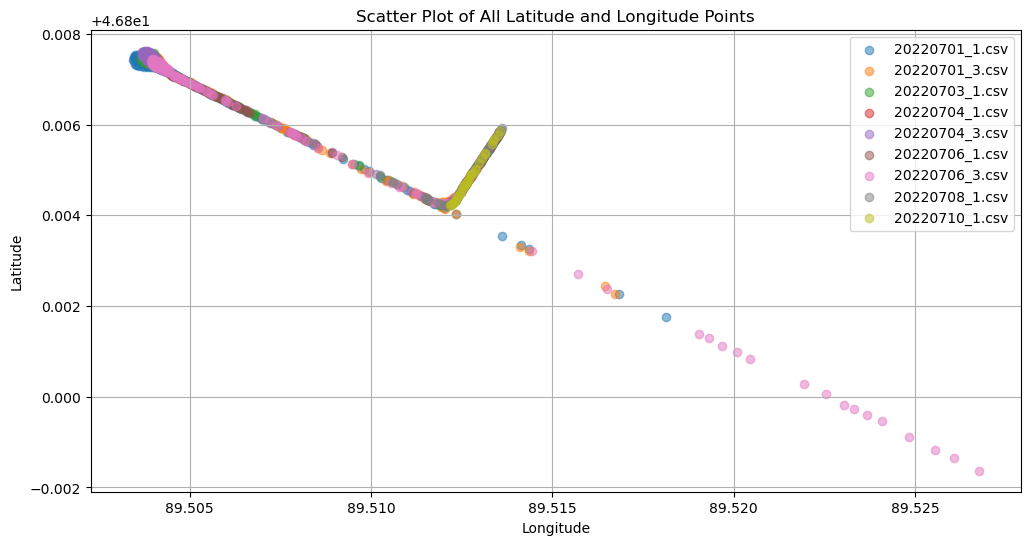

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义文件夹路径
folder_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\2_deduplication_0508'

# 初始化绘图
plt.figure(figsize=(12, 6))

# 遍历文件夹中的所有.csv文件
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # 构造完整的文件路径
        file_path = os.path.join(folder_path, file_name)
        
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 假设CSV文件中有以下列名'LON'和'LAT'包含经纬度数据
        if 'LON' in df.columns and 'LAT' in df.columns:
            # 绘制散点图
            plt.scatter(df['LON'], df['LAT'], alpha=0.5, label=f'{file_name}')
        else:
            print(f"文件 {file_name} 中缺少 'LON' 或 'LAT' 列。")

# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title('Scatter Plot of All Latitude and Longitude Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

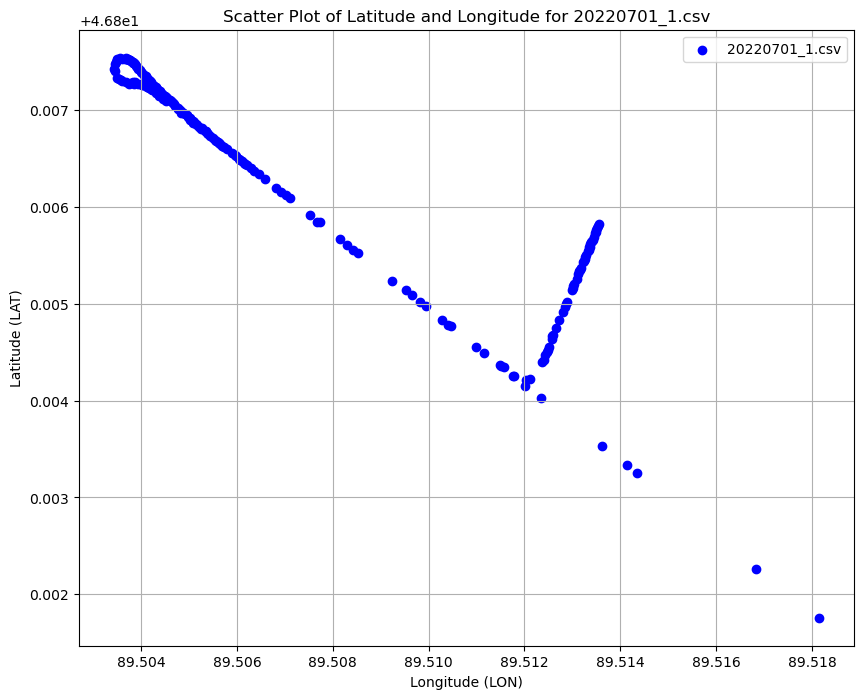

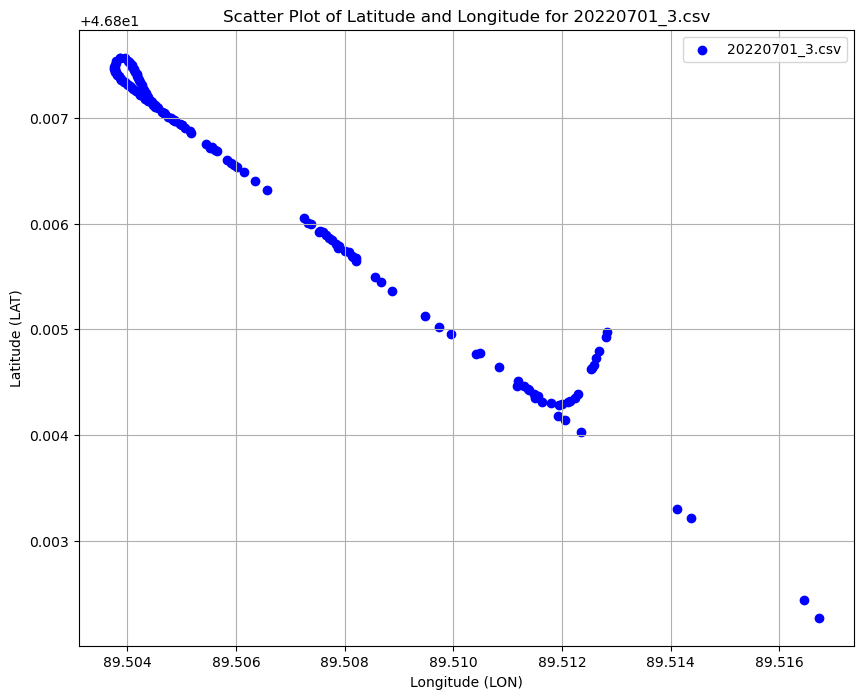

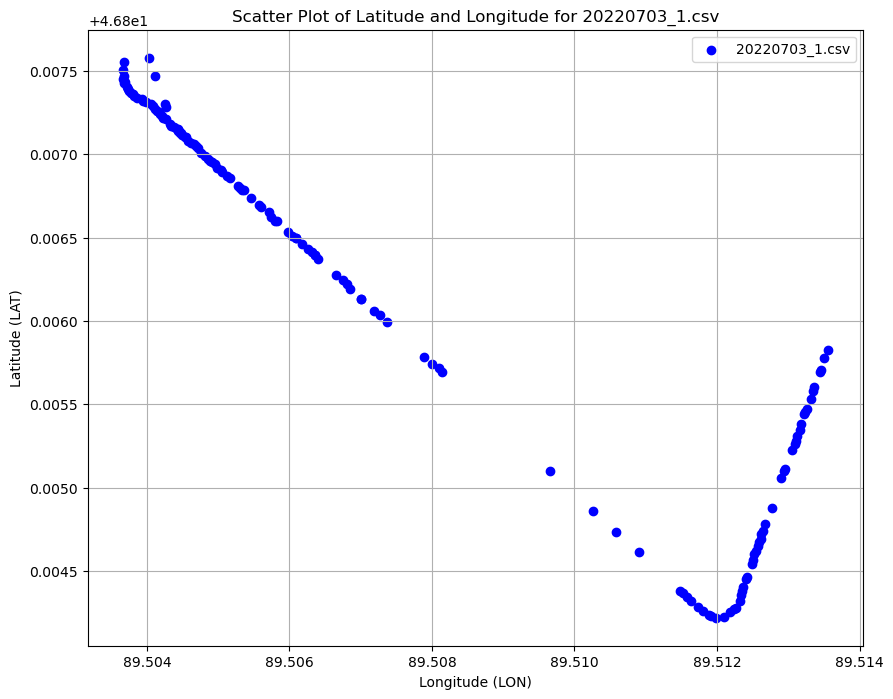

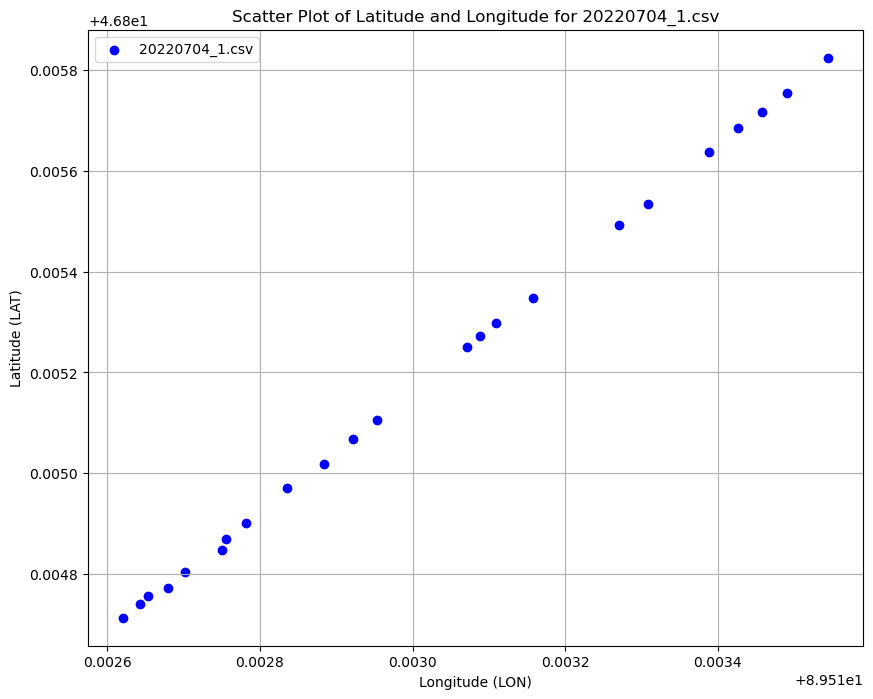

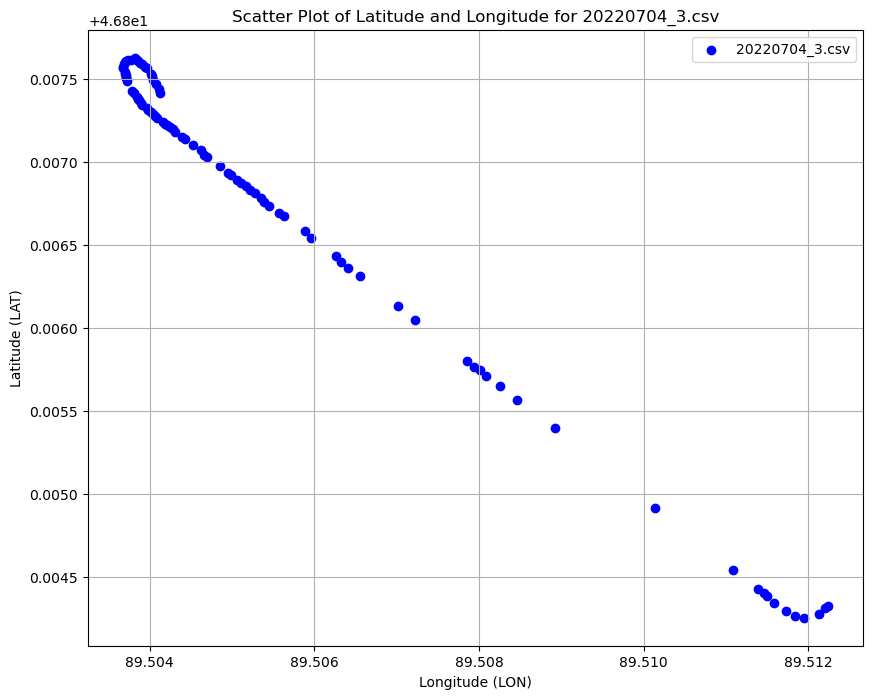

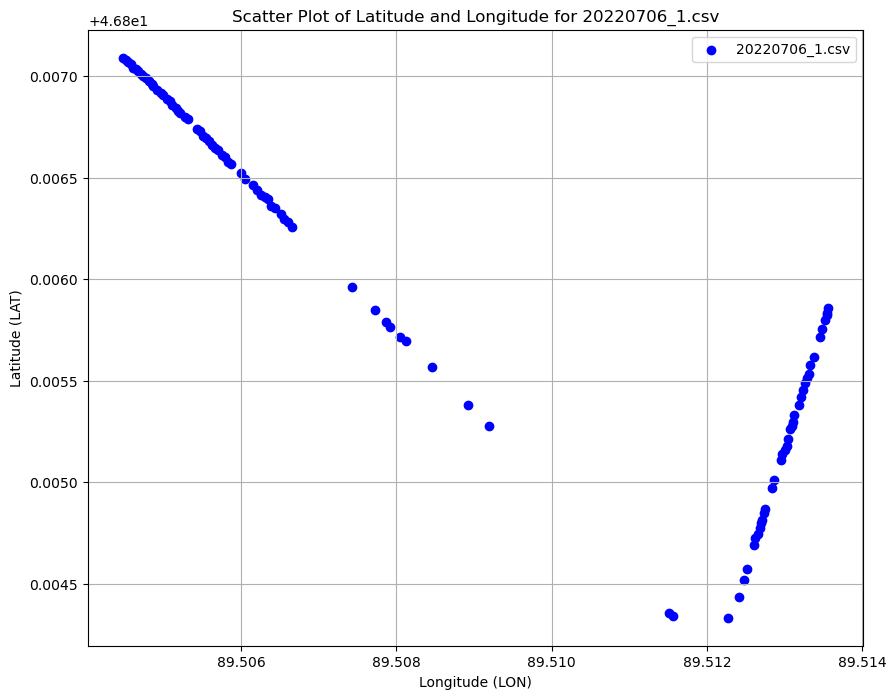

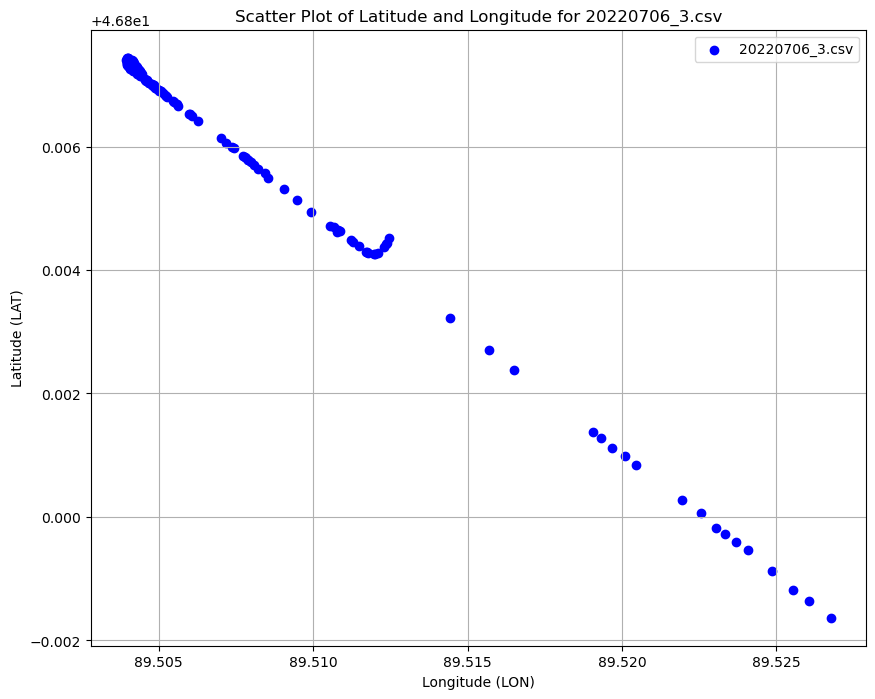

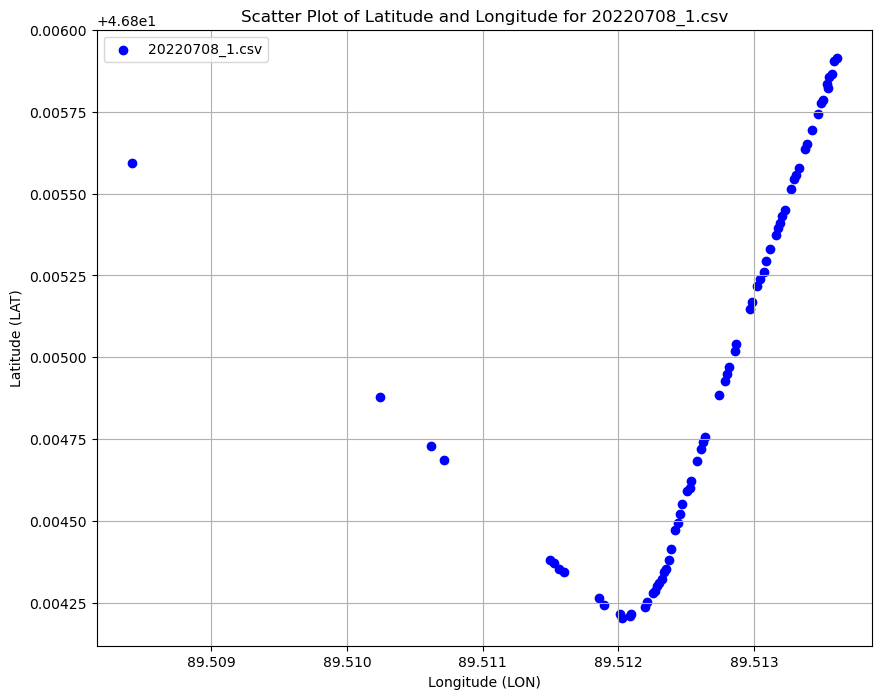

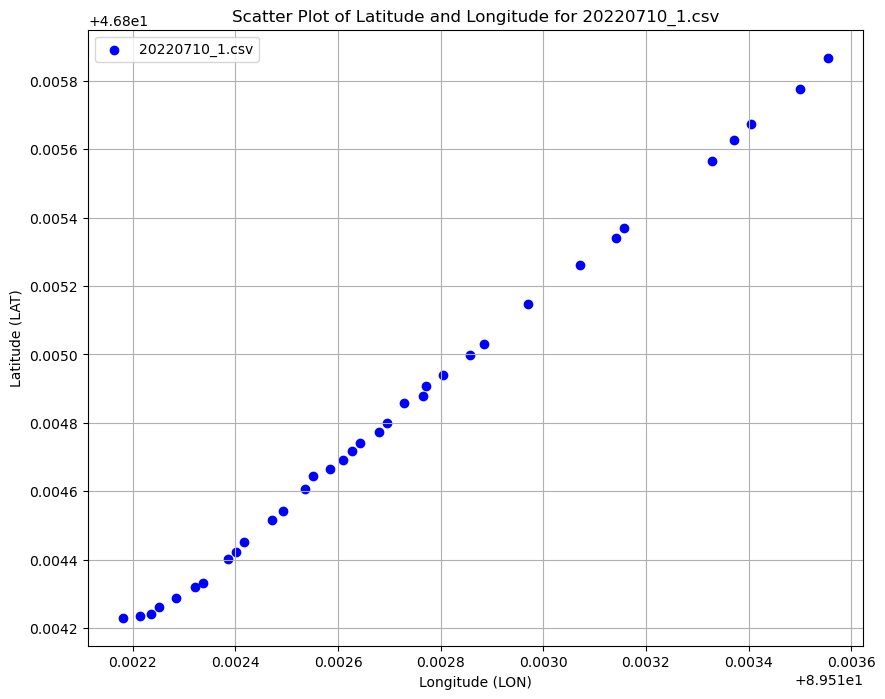

所有文件的散点图已绘制完毕。


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义文件夹路径
folder_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\2_deduplication_0508'

# 遍历文件夹中的所有.csv文件
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # 构造完整的文件路径
        file_path = os.path.join(folder_path, file_name)

        # 读取CSV文件
        try:
            df = pd.read_csv(file_path)

            # 假设CSV文件中有以下列名'LON'和'LAT'包含经纬度数据
            if 'LON' in df.columns and 'LAT' in df.columns:
                # 创建一个新的图形
                plt.figure(figsize=(10, 8))

                # 绘制散点图
                plt.scatter(df['LON'], df['LAT'], color='blue', marker='o', label=file_name)

                # 添加标题和坐标轴标签
                plt.xlabel('Longitude (LON)')
                plt.ylabel('Latitude (LAT)')
                plt.title('Scatter Plot of Latitude and Longitude for ' + file_name)
                plt.legend()
                plt.grid(True)

                # 显示图形
                plt.show()
            else:
                print(f"文件 {file_name} 中缺少 'LON' 或 'LAT' 列。")
        except Exception as e:
            print(f"读取文件 {file_name} 时发生错误：{e}")

print("所有文件的散点图已绘制完毕。")

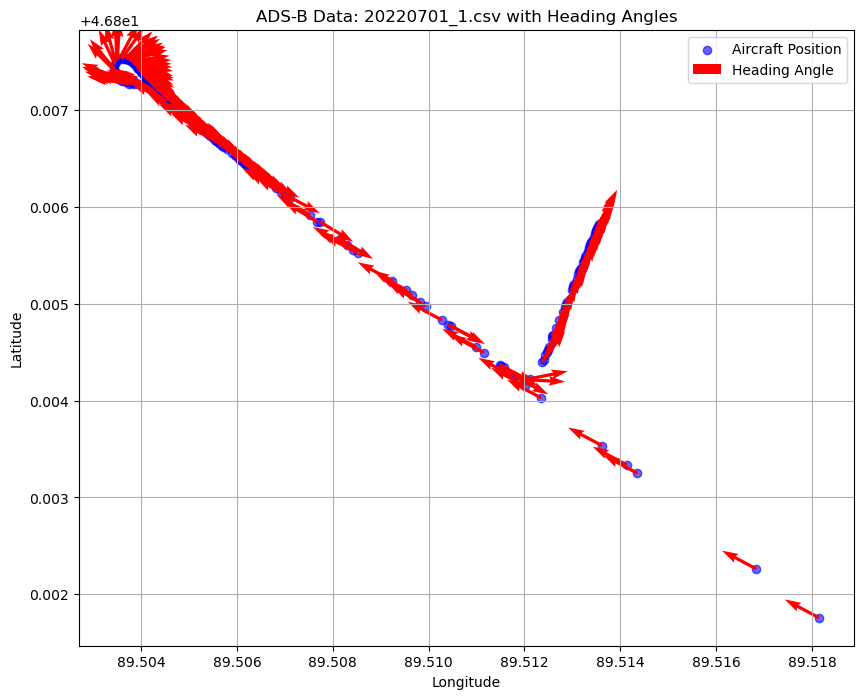

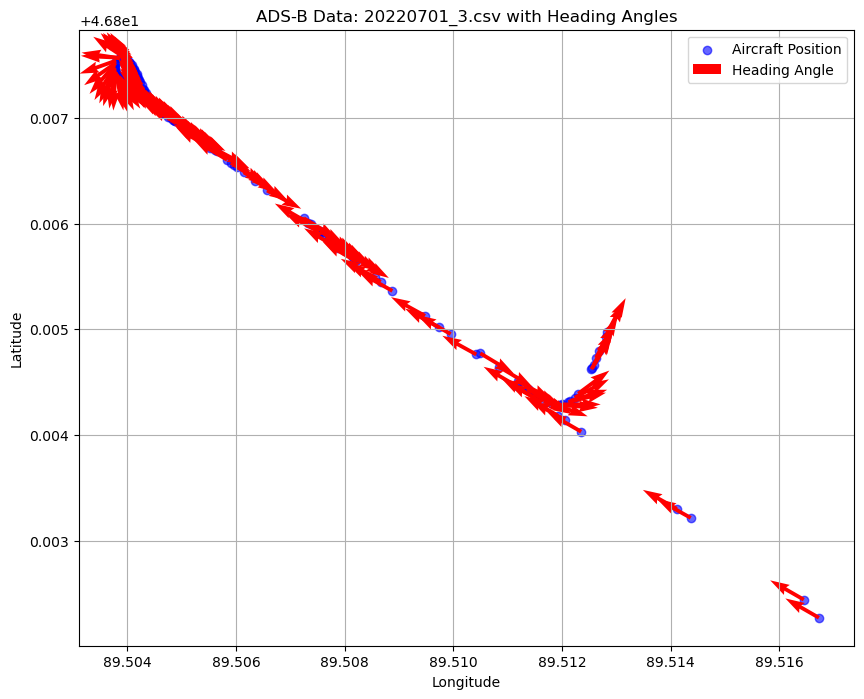

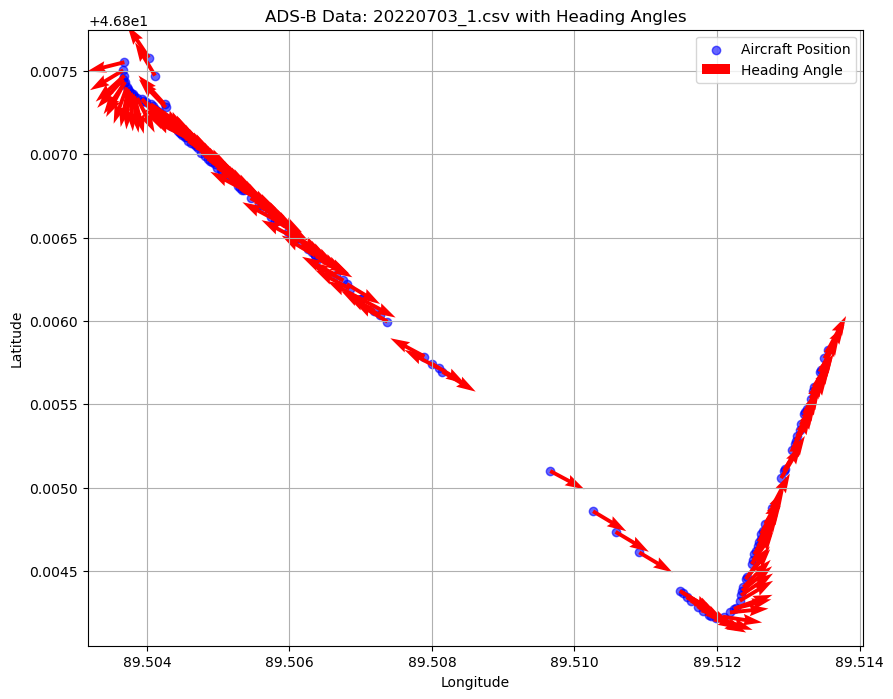

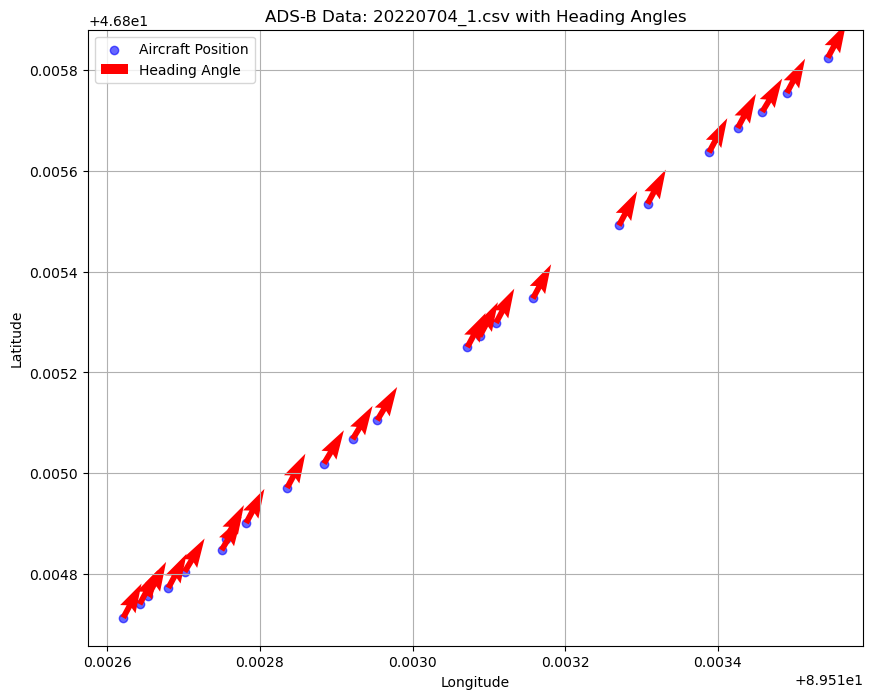

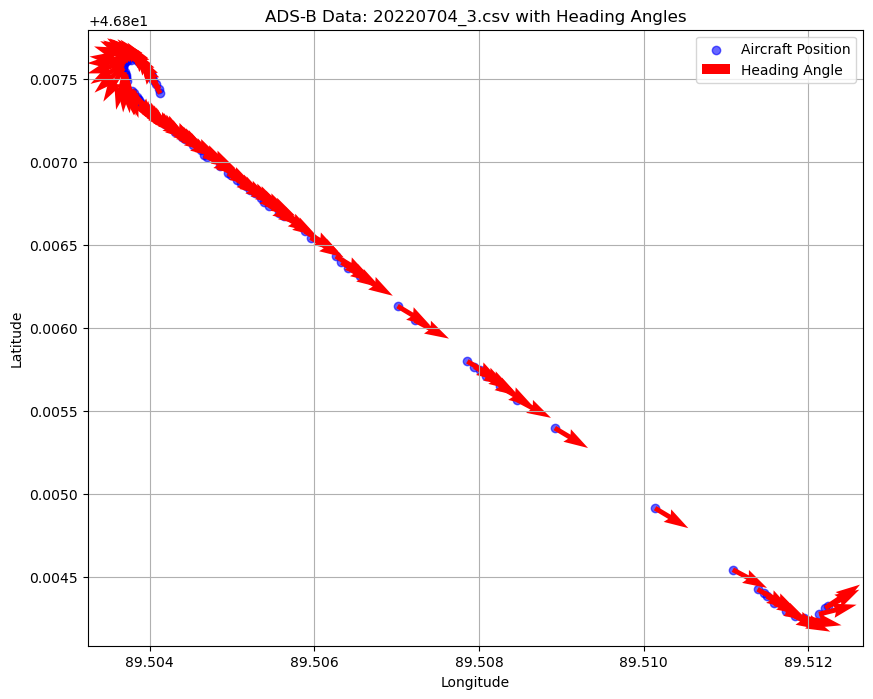

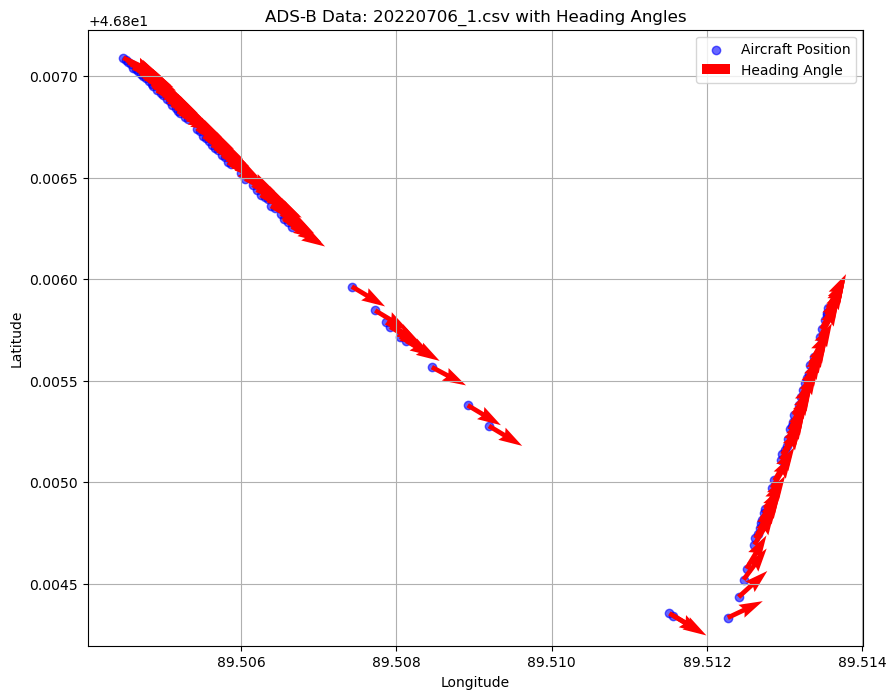

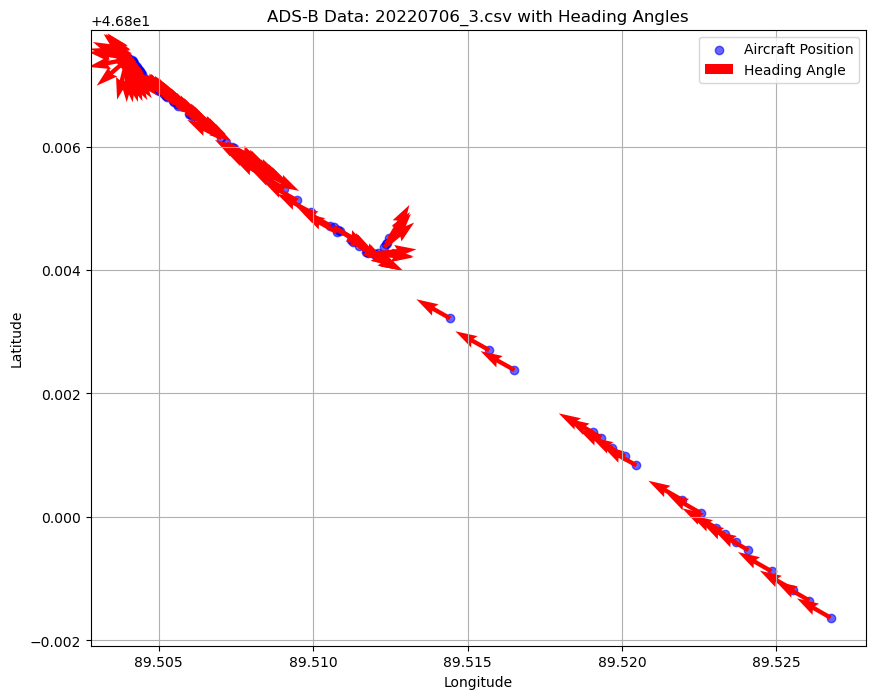

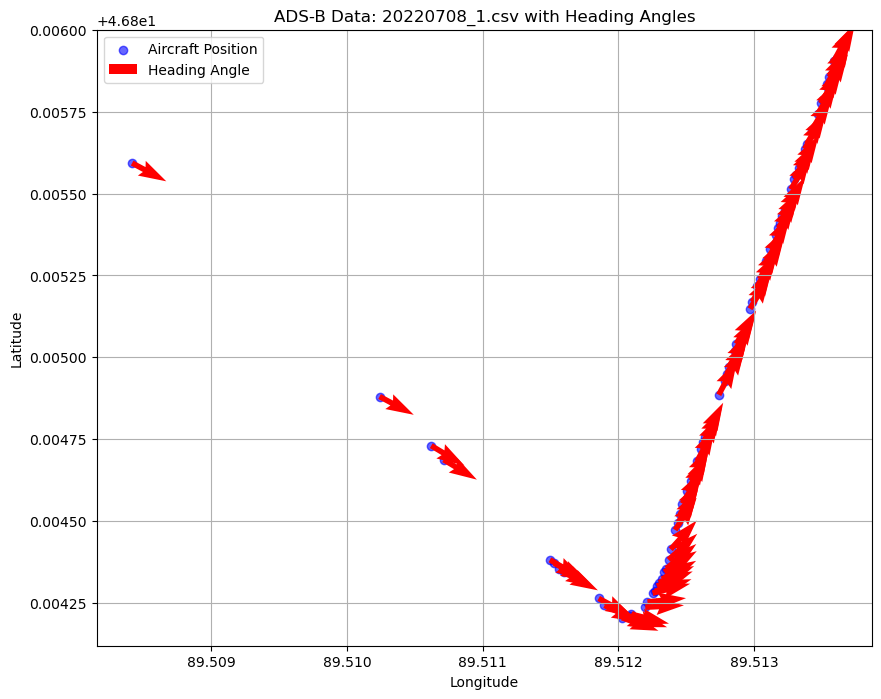

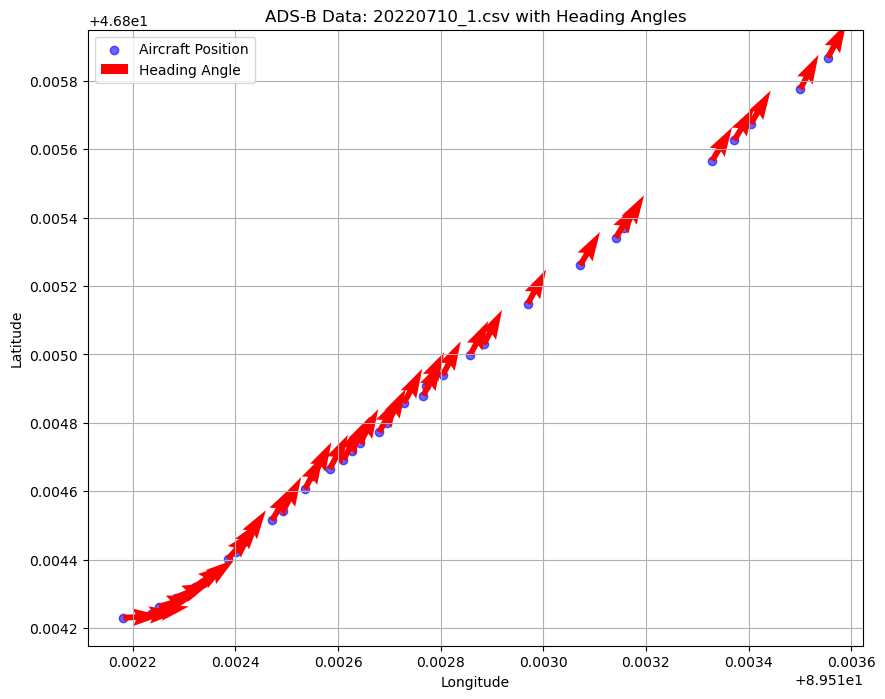

所有文件的散点图已绘制完毕。


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# 定义文件夹路径
folder_path = r'D:\Project\Convert_Dataset\轨迹预测数据\0509数据\降落\2_deduplication_0508'

# 遍历文件夹中的所有.csv文件
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # 构造完整的文件路径
        file_path = os.path.join(folder_path, file_name)

        # 初始化用于存储数据的列表
        lons = []
        lats = []
        headings = []

        # 尝试打开并读取文件
        try:
            # 读取CSV文件
            df = pd.read_csv(file_path)

            # 假设CSV文件中有以下列名'LON', 'LAT', 'TA'包含经纬度和航向角数据
            lons = df['LON'].values
            lats = df['LAT'].values
            headings = df['TA'].values

            # 将航向角转换为弧度
            headings_rad = np.radians(headings)

            # 计算箭头的位置和方向
            arrow_length = 50  # 根据实际情况调整箭头长度
            dx = arrow_length * np.sin(headings_rad)
            dy = arrow_length * np.cos(headings_rad)

            # 创建一个新的图形
            plt.figure(figsize=(10, 8))

            # 绘制经度和纬度的散点图
            plt.scatter(lons, lats, color='blue', alpha=0.6, label='Aircraft Position')

            # 添加箭头表示航向角方向
            plt.quiver(lons, lats, dx, dy, color='red', scale=1000, label='Heading Angle')

            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'ADS-B Data: {file_name} with Heading Angles')
            plt.grid(True)
            plt.legend()

            # 显示图形
            plt.show()

        except FileNotFoundError:
            print(f"文件 {file_path} 未找到。")
        except Exception as e:
            print(f"读取文件 {file_name} 时发生错误: {e}")

print("所有文件的散点图已绘制完毕。")